In [169]:
import warnings
warnings.filterwarnings("ignore")
import sys
from herdingspikes.hs2 import HSDetection
from herdingspikes.probe import HierlmannVisapyEmulationProbe
import matplotlib.pyplot as plt
import h5py
import numpy as np
from PIL import Image
import random

%matplotlib inline

np.random.seed(0)

In [170]:
# raw data location
data_path = 'visapy_data.npy'

In [171]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data

torch.cuda.set_device(3)
torch.manual_seed(0)

In [172]:
# detection parameters
to_localize = True
cutout_start = 14
cutout_end = 36
threshold = 24
file_directory = 'results/'
file_name = 'ProcessedSpikes_visapy'

Probe = HierlmannVisapyEmulationProbe('visapy_data.npy')
H = HSDetection(Probe, to_localize, cutout_start, cutout_end, threshold,
                maa=0, maxsl=12, minsl=3, ahpthr=0, out_file_name=file_name, 
                file_directory_name=file_directory, save_all=True)
H.DetectFromRaw()
H.LoadDetected()

File size: 122400102
Number of channels: 102
# Sampling rate: 32000
# Localization On
# Not Masking any Channels
# Writing out extended detection info
# Number of recorded channels: 102
# Analysing frames: 1200001, Seconds:37.50003125
# Frames before spike in cutout: 32
# Frames after spike in cutout: 70
# tcuts: 44 59
# tInc: 50000
# Analysing 50000 frames; from -44 to 50059
# Analysing 50000 frames; from 49956 to 100059
# Analysing 50000 frames; from 99956 to 150059
# Analysing 50000 frames; from 149956 to 200059
# Analysing 50000 frames; from 199956 to 250059
# Analysing 50000 frames; from 249956 to 300059
# Analysing 50000 frames; from 299956 to 350059
# Analysing 50000 frames; from 349956 to 400059
# Analysing 50000 frames; from 399956 to 450059
# Analysing 50000 frames; from 449956 to 500059
# Analysing 50000 frames; from 499956 to 550059
# Analysing 50000 frames; from 549956 to 600059
# Analysing 50000 frames; from 599956 to 650059
# Analysing 50000 frames; from 649956 to 700059

## Find Closest channels

In [173]:
x_path = 'z_integer.npy'
y_path = 'y_integer.npy'
elec_x_int = np.load(x_path)
elec_y_int = np.load(y_path)

ky = 9 / np.max(np.diff(sorted(elec_y_int)))
elec_x = elec_x_int * ky
elec_y = elec_y_int * ky
elec_x -= np.min(elec_x)
elec_y -= np.min(elec_y)

In [174]:
H.spikes

,ch,t,Amplitude,x,y,Shape
0,26,395,5439,64.550,146.480,"[-7, -2, 4, -3, -8, 0, -8, -19, -7, -9, -40, -..."
1,35,478,6359,31.835,67.175,"[35, 33, 26, 10, -2, 2, 4, -5, -7, -10, -18, -..."
2,58,515,6031,61.038,267.137,"[15, 16, 8, 2, -7, -20, -25, -23, -27, -35, -4..."
3,68,539,6580,12.200,63.673,"[-27, -20, -14, -13, -27, -36, -38, -45, -50, ..."
4,65,577,4436,13.483,234.357,"[9, 7, 11, 14, 4, -1, -8, -11, -3, -7, -23, -3..."
5,93,597,8700,44.558,28.816,"[-14, -8, -12, -27, -27, -19, -31, -48, -53, -..."
6,98,604,8182,53.929,118.834,"[-22, -25, -40, -42, -20, -15, -23, -4, 4, -21..."
7,57,626,5685,12.352,278.124,"[-1, 7, 11, 1, -16, -15, -8, -26, -40, -42, -6..."
8,60,807,6195,9.359,154.280,"[-16, -5, -16, -24, -10, 0, -6, -6, -2, -21, -..."
9,72,874,6763,63.996,139.242,"[9, 2, 4, 6, -8, -28, -26, -16, -29, -44, -54,..."


In [175]:
datapoints = []
for i in range(len(elec_x)):
    datapoints.append([elec_x[i], elec_y[i]])
datapoints = np.asarray(datapoints)
print(datapoints)

[[ 59.54058193 179.98346095]
 [  0.         233.97886677]
 [ 74.42572741 242.97794793]
 [ 59.54058193  17.99816233]
 [ 29.77029096  35.99632466]
 [ 59.54058193 143.98621746]
 [ 44.65543645 242.97794793]
 [ 14.88514548 296.97243492]
 [ 74.42572741  44.99540582]
 [  0.         107.9898928 ]
 [ 29.77029096 143.98621746]
 [  0.          17.99816233]
 [ 59.54058193  53.99448698]
 [ 44.65543645  80.99264931]
 [ 74.42572741 170.98437979]
 [ 44.65543645 206.98070444]
 [  0.         197.98162328]
 [ 14.88514548 278.97427259]
 [ 44.65543645 296.97243492]
 [ 14.88514548  44.99540582]
 [ 59.54058193  89.99173047]
 [  0.         215.9797856 ]
 [ 74.42572741 278.97427259]
 [ 14.88514548  26.99724349]
 [ 44.65543645  44.99540582]
 [ 44.65543645  98.99081164]
 [ 74.42572741 152.98621746]
 [ 29.77029096   0.        ]
 [ 74.42572741  26.99724349]
 [  0.          53.99448698]
 [ 44.65543645 134.98713629]
 [ 44.65543645  62.99356815]
 [ 59.54058193 287.97335375]
 [ 59.54058193 215.9797856 ]
 [ 59.54058193

In [176]:
data = np.load('visapy_data.npy')
frame_set = data.reshape((1200001,102))
print("Frame shape: ", frame_set.shape)
print("Whole Dataset: ", frame_set)

Frame shape:  (1200001, 102)
Whole Dataset:  [[  4 -18   3 ...   5 -11  -4]
 [  3 -26  -4 ...   6 -13   6]
 [  3 -25  -6 ...   5 -18   3]
 ...
 [  1  32  -5 ...   7   2   0]
 [-17  27  -9 ...  12  -1  11]
 [-13  21  -8 ...  15   0  10]]


In [177]:
def find_closest(channel):
    x = {}
    for i in range(datapoints.shape[0]):
        x[i] = ((datapoints[i, 0] - datapoints[channel, 0])**2 + (datapoints[i, 1] - datapoints[channel, 1])**2)**0.5
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    sorted_by_value = np.array(sorted_by_value)
    final_list = sorted_by_value[0:5, 0]
    return final_list

In [178]:
print(H.spikes['Shape'][0])
print(frame_set[395-14:395+37, 26])

[  -7   -2    4   -3   -8    0   -8  -19   -7   -9  -40  -56  -59  -85
 -107 -107  -99  -86  -65  -40  -32  -21    2    6    8   25   30   29
   33   22   14   31   40   29   28   34   40   39   24   11   16   14
   -2    3   21   17   10    9    7    7    9]
[  -7   -2    4   -3   -8    0   -8  -19   -7   -9  -40  -56  -59  -85
 -107 -107  -99  -86  -65  -40  -32  -21    2    6    8   25   30   29
   33   22   14   31   40   29   28   34   40   39   24   11   16   14
   -2    3   21   17   10    9    7    7    9]


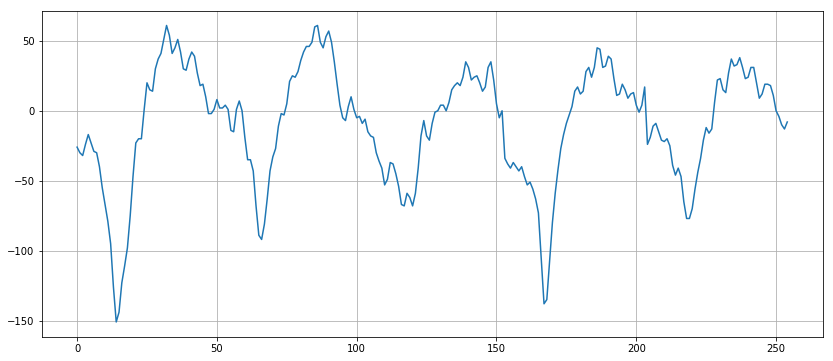

In [179]:
# Concatenate Neighbouring Channels
plt.figure(figsize=(14, 6))
final_list = find_closest(98)
tim = 1148331
sig_data = []
for i in final_list:
    sig_data.append(frame_set[tim-14:tim+37, int(i)])
sig_data = np.array(sig_data)
sig_data = sig_data.ravel()
plt.plot(sig_data)
#plt.legend(loc=4)
plt.grid()
plt.show()

In [180]:
def concat_neighbour(channel, time):
    final_list = find_closest(channel)
    sig_data = []
    for i in final_list:
        sig_data.append(frame_set[time-14:time+37, int(i)])
    sig_data = np.array(sig_data)
    sig_data = sig_data.ravel()
    return sig_data

In [181]:
length = H.spikes['Shape'][0].shape[0]*5
total_sigs = H.spikes['Shape'].shape[0]

electrode_data = np.zeros([total_sigs, length])
list_of_sigs = np.random.choice(total_sigs, total_sigs, replace=False)

for i in list_of_sigs:
    electrode_data[i, :] = concat_neighbour(H.spikes['ch'][i], H.spikes['t'][i])
print(electrode_data.shape)

(19341, 255)


In [182]:
train_lim = int(0.8*electrode_data.shape[0])
electrode_data_train = electrode_data[:train_lim, :]
electrode_data_test = electrode_data[train_lim:, :]

print("Training Datasize:", electrode_data_train.shape)
print("Test Datasize:", electrode_data_test.shape)

Training Datasize: (15472, 255)
Test Datasize: (3869, 255)


In [183]:
from sklearn.decomposition import PCA


def find_scaled_mse(original, recons, params):
    mse = []
    for i in range(original.shape[0]):
        se = (original[i, :] - recons[i, :])**2
        se = se/np.var(original[i, :])
        mse.append(np.mean(se))
    mse = np.array(mse)
    print(params, np.median(mse))
    return mse

# dict_of_outputs = {'AE_2': [<np.array>], 'AE_4':[<np.array>], ... 'PCA':[<np.array>], 'Original': [<np.array>]}

def plot_correlation(dict_of_outputs):
    plt.figure(figsize=(14,8))

    keys = list(dict_of_outputs.keys())
    vals = list(dict_of_outputs.values())
    
    size = len(keys)/2 *100 + 20
    
    for i in range(len(keys)):
        plt.subplot(size+i)
        plt.scatter(electrode_data_test, vals[i], s=0.5)
        plt.title(str(keys[i]))
    plt.show()

# dict_of_outputs = {'AE_2': [<list>], 'AE_4':[<list>], ... 'PCA':[<list>], 'Original': [<list>]}

def gen_boxplots(dict_of_outputs):
    fig = plt.figure(1, figsize=(7,5))
    
    keys = list(dict_of_outputs.keys())
    vals = list(dict_of_outputs.values())
    
    ax = fig.add_subplot(111)
    ax.boxplot(vals, showfliers=False, notch=True)
    ax.grid()
    ax.set_xticklabels(keys)
    plt.show()

# dict_of_outputs = {'AE_2': [<np.array>], 'AE_4':[<np.array>], ... 'PCA':[<np.array>], 'Original': [<np.array>]}

def find_correlation_coeff(dict_of_outputs):
    
    keys = list(dict_of_outputs.keys())
    vals = list(dict_of_outputs.values())
    corrs = {}
    for i in range(len(keys)):
        corrs[keys[i]] = [np.corrcoef(electrode_data_test[j],vals[i][j])[0,1] 
                             for j in range(electrode_data_test.shape[0])]
    for i in keys:
        print(i, np.median(corrs[i]))
    gen_boxplots(corrs)

def comp_pca(components):
    pca = PCA(n_components=components, svd_solver='full')
    pca.fit(electrode_data_test)
    e_data_pca = pca.transform(electrode_data_test)
    e_data_proj = pca.inverse_transform(e_data_pca)
    return e_data_proj

def get_network_output(model, embedding):
    enc_final = np.zeros([electrode_data_test.shape[0], embedding])
    out_final = np.zeros([electrode_data_test.shape[0], 255])

    for i in range(electrode_data_test.shape[0]):
        data = electrode_data_test[i, :]
        data = torch.from_numpy(data).float()

        enc, o = model.forward(data)
        o = (o.data).cpu().numpy()
        enc = (enc.data).cpu().numpy()

        enc_final[i, :] = enc[:]
        out_final[i, :] = o[:]
    
    return enc_final, out_final

PCA 0.8987976170235958


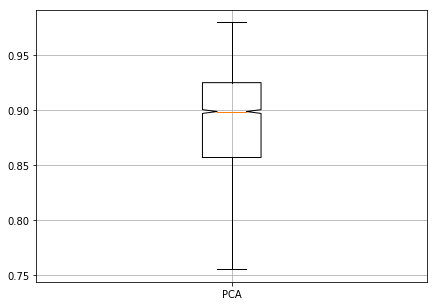

In [184]:
#_, out = get_network_output(ae_1, 2)
out_pca = comp_pca(0)
d = {'PCA': out_pca}
find_correlation_coeff(d)

PCA 0.23705086657878702


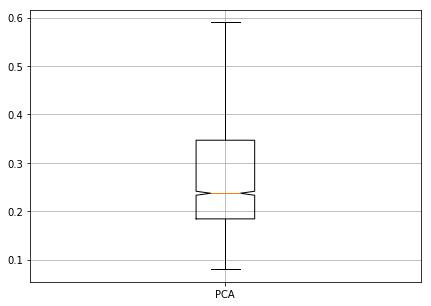

In [185]:
x = find_scaled_mse(electrode_data_test, out_pca, 'PCA')
gen_boxplots({'PCA':x})

In [149]:
random.seed(0)

def train_ae(model, input_data, criterion, optimizer, epoch_range,  batch_size):
    losses = []
    mdl_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('TOTAL PARAMETERS FOR MODEL:', mdl_total_params)
    
    for num_epoch in range(epoch_range):
        selected = random.sample(range(0, input_data.shape[0]), batch_size)
        x = np.zeros((batch_size, 255))
        for i, feats in enumerate(selected):
            x[i, :] = input_data[feats, :]
        x = torch.from_numpy(x).float().cuda()
        #---------FORWARD------------#
        enc, out = model.forward(x)
        out = torch.tensor(out).float().cuda()
        loss = criterion(out, x)
        #---------BACKWARD------------#
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data[0])
        if num_epoch%100 == 0:
            print('epoch [{}/{}], loss:{:.8f}, avg:{:.8f}'.format(num_epoch + 1, epoch_range, 
                                                              loss.data[0], sum(losses[-10:])/len(losses[-10:])))
    return enc, out, losses

def init_weights(layer):
    if type(layer) == nn.Linear:
        nn.init.xavier_normal_(layer.weight)

In [150]:
# input -> 80 -> 40 -> 25 -> 15 -> 10 -> emb -> 10 -> 25 -> 80 -> input

class autoencoder_5(nn.Module):
    def __init__(self, input_size, embedding_size):
        super(autoencoder_5, self).__init__()
        activation_layer = nn.LeakyReLU()
        self.encoder = nn.Sequential(nn.Linear(input_size, 80),
                                     activation_layer,
                                     nn.Linear(80, 40),
                                     activation_layer,
                                     nn.Linear(40, 25),
                                     activation_layer,
                                     nn.Linear(25, 15),
                                     activation_layer,
                                     nn.Linear(15, 10),
                                     activation_layer,
                                     nn.Linear(10, embedding_size))
        self.decoder = nn.Sequential(nn.Linear(embedding_size, 10),
                                     activation_layer,
                                     nn.Linear(10, 25),
                                     activation_layer,
                                     nn.Linear(25, 80),
                                     activation_layer,
                                     nn.Linear(80, input_size))
    
    def forward(self, x):
        enc = self.encoder(x)
        dec = self.decoder(enc)
        return enc, dec

In [151]:
# Training the AE for encoder4

# Training for 4 embeddings

epoch_range = 100000
batch_size = 300
learning_rate = 0.0001

embedding_size = 4

ae_54 = autoencoder_5(length, embedding_size).cuda()
ae_54.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_54.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_54 = train_ae(ae_54, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Training for 2 embeddings

embedding_size = 2

ae_52 = autoencoder_5(length, embedding_size).cuda()
ae_52.apply(init_weights)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    ae_52.parameters(), lr=learning_rate, weight_decay=0.001)

enc, out, losses_52 = train_ae(ae_52, electrode_data_train, criterion, optimizer, epoch_range, batch_size)

# Saving relevant files

# Saving Losses
np.save('models/new_data_models/losses_5_4_v2', np.array(losses_54))
np.save('models/new_data_models/losses_5_2_v2', np.array(losses_52))


# Saving Models
torch.save(ae_54, 'models/new_data_models/ae_5_4_v2.pt') #Saving the autoencoder model
torch.save(ae_52, 'models/new_data_models/ae_5_2_v2.pt') #Saving the autoencoder model

TOTAL PARAMETERS FOR MODEL: 48399
epoch [1/100000], loss:1296.63122559, avg:1296.63122559
epoch [101/100000], loss:898.15130615, avg:932.04443359
epoch [201/100000], loss:343.10467529, avg:347.60607910
epoch [301/100000], loss:285.90740967, avg:272.49276733
epoch [401/100000], loss:270.45559692, avg:270.62484741
epoch [501/100000], loss:258.26016235, avg:268.61776733
epoch [601/100000], loss:258.93966675, avg:262.81503296
epoch [701/100000], loss:254.98728943, avg:254.60636902
epoch [801/100000], loss:248.20820618, avg:242.71646118
epoch [901/100000], loss:230.96643066, avg:240.53511047
epoch [1001/100000], loss:228.88191223, avg:230.52749634
epoch [1101/100000], loss:225.30128479, avg:224.64631653
epoch [1201/100000], loss:218.10516357, avg:214.47354126
epoch [1301/100000], loss:210.03594971, avg:212.15202332
epoch [1401/100000], loss:206.63822937, avg:210.98840332
epoch [1501/100000], loss:211.58956909, avg:210.73648071
epoch [1601/100000], loss:206.36552429, avg:212.14102173
epoch [

epoch [14301/100000], loss:180.19749451, avg:179.05146790
epoch [14401/100000], loss:185.14198303, avg:178.85977173
epoch [14501/100000], loss:180.42237854, avg:180.51945496
epoch [14601/100000], loss:179.98628235, avg:180.19303894
epoch [14701/100000], loss:173.78868103, avg:179.33541870
epoch [14801/100000], loss:183.16070557, avg:180.58543396
epoch [14901/100000], loss:187.35594177, avg:181.10942078
epoch [15001/100000], loss:172.39506531, avg:179.91670227
epoch [15101/100000], loss:185.98345947, avg:182.15715027
epoch [15201/100000], loss:173.64468384, avg:178.84814453
epoch [15301/100000], loss:175.70344543, avg:178.86824036
epoch [15401/100000], loss:186.77473450, avg:180.80012512
epoch [15501/100000], loss:177.59973145, avg:180.50268555
epoch [15601/100000], loss:183.07160950, avg:181.39985657
epoch [15701/100000], loss:179.78570557, avg:182.07243347
epoch [15801/100000], loss:173.62504578, avg:179.91007996
epoch [15901/100000], loss:173.26615906, avg:181.14076233
epoch [16001/1

epoch [28501/100000], loss:167.50650024, avg:175.19050598
epoch [28601/100000], loss:175.87139893, avg:177.40043640
epoch [28701/100000], loss:177.67735291, avg:178.06491089
epoch [28801/100000], loss:178.80982971, avg:175.28961182
epoch [28901/100000], loss:177.50212097, avg:175.17951965
epoch [29001/100000], loss:171.32598877, avg:177.69160461
epoch [29101/100000], loss:181.53273010, avg:174.81913757
epoch [29201/100000], loss:175.12745667, avg:179.14476013
epoch [29301/100000], loss:186.17091370, avg:177.92813110
epoch [29401/100000], loss:175.28874207, avg:175.74436951
epoch [29501/100000], loss:177.88536072, avg:175.82710266
epoch [29601/100000], loss:174.27032471, avg:178.31828308
epoch [29701/100000], loss:176.73178101, avg:176.72810364
epoch [29801/100000], loss:179.59304810, avg:177.27012634
epoch [29901/100000], loss:174.94906616, avg:176.05967712
epoch [30001/100000], loss:175.90966797, avg:175.98075867
epoch [30101/100000], loss:179.07119751, avg:177.15927124
epoch [30201/1

epoch [42701/100000], loss:170.80561829, avg:173.44541931
epoch [42801/100000], loss:174.69201660, avg:176.25201416
epoch [42901/100000], loss:177.14244080, avg:174.22300720
epoch [43001/100000], loss:168.88064575, avg:173.71665955
epoch [43101/100000], loss:175.61122131, avg:174.01582336
epoch [43201/100000], loss:176.66026306, avg:176.41304016
epoch [43301/100000], loss:173.15968323, avg:172.02101135
epoch [43401/100000], loss:175.68237305, avg:174.30895996
epoch [43501/100000], loss:170.52148438, avg:173.97581482
epoch [43601/100000], loss:178.19970703, avg:177.34512329
epoch [43701/100000], loss:177.80162048, avg:174.82568359
epoch [43801/100000], loss:174.91537476, avg:174.71479797
epoch [43901/100000], loss:176.60679626, avg:173.89016724
epoch [44001/100000], loss:173.46763611, avg:173.28988647
epoch [44101/100000], loss:176.87458801, avg:173.41246033
epoch [44201/100000], loss:174.96437073, avg:176.00187683
epoch [44301/100000], loss:178.81866455, avg:170.93736267
epoch [44401/1

epoch [56901/100000], loss:171.38653564, avg:173.32055664
epoch [57001/100000], loss:170.45906067, avg:172.60401917
epoch [57101/100000], loss:177.43193054, avg:175.17356873
epoch [57201/100000], loss:172.14956665, avg:172.85765076
epoch [57301/100000], loss:171.54522705, avg:172.40676880
epoch [57401/100000], loss:176.77066040, avg:171.83763123
epoch [57501/100000], loss:168.31411743, avg:173.08053589
epoch [57601/100000], loss:170.74546814, avg:172.88534546
epoch [57701/100000], loss:174.43846130, avg:173.96781921
epoch [57801/100000], loss:170.70703125, avg:173.90354919
epoch [57901/100000], loss:177.09225464, avg:172.12922668
epoch [58001/100000], loss:176.64706421, avg:173.65687561
epoch [58101/100000], loss:170.80194092, avg:172.74087524
epoch [58201/100000], loss:172.93870544, avg:172.48567200
epoch [58301/100000], loss:175.49278259, avg:171.27812195
epoch [58401/100000], loss:171.58055115, avg:171.33647156
epoch [58501/100000], loss:169.60925293, avg:170.16850281
epoch [58601/1

epoch [71101/100000], loss:167.21376038, avg:170.51193237
epoch [71201/100000], loss:164.98590088, avg:170.82336426
epoch [71301/100000], loss:175.32144165, avg:172.16891479
epoch [71401/100000], loss:173.84938049, avg:170.88870239
epoch [71501/100000], loss:173.78948975, avg:170.50447083
epoch [71601/100000], loss:167.45899963, avg:171.28424072
epoch [71701/100000], loss:167.40093994, avg:167.61473083
epoch [71801/100000], loss:159.72367859, avg:168.76158142
epoch [71901/100000], loss:171.36364746, avg:169.03421021
epoch [72001/100000], loss:171.61482239, avg:170.06578064
epoch [72101/100000], loss:174.09817505, avg:173.54020691
epoch [72201/100000], loss:174.03530884, avg:170.79283142
epoch [72301/100000], loss:168.43154907, avg:170.54153442
epoch [72401/100000], loss:175.16181946, avg:169.67424011
epoch [72501/100000], loss:170.98869324, avg:170.58128357
epoch [72601/100000], loss:166.12135315, avg:167.73817444
epoch [72701/100000], loss:169.72979736, avg:168.86668396
epoch [72801/1

epoch [85301/100000], loss:172.68443298, avg:168.88047791
epoch [85401/100000], loss:162.35066223, avg:169.27653503
epoch [85501/100000], loss:170.45385742, avg:168.95414734
epoch [85601/100000], loss:167.17501831, avg:166.40542603
epoch [85701/100000], loss:158.58421326, avg:166.60592651
epoch [85801/100000], loss:171.98056030, avg:168.84197998
epoch [85901/100000], loss:167.41465759, avg:167.54614258
epoch [86001/100000], loss:168.42941284, avg:169.85131836
epoch [86101/100000], loss:166.59260559, avg:169.30728149
epoch [86201/100000], loss:162.56419373, avg:168.56822205
epoch [86301/100000], loss:173.89656067, avg:170.60646057
epoch [86401/100000], loss:175.33287048, avg:172.40692139
epoch [86501/100000], loss:169.09835815, avg:169.20623779
epoch [86601/100000], loss:163.86802673, avg:168.38511658
epoch [86701/100000], loss:167.06825256, avg:167.90328979
epoch [86801/100000], loss:168.59837341, avg:166.70654297
epoch [86901/100000], loss:162.83963013, avg:169.88395691
epoch [87001/1

epoch [99501/100000], loss:164.18913269, avg:165.64447021
epoch [99601/100000], loss:160.34849548, avg:166.82624817
epoch [99701/100000], loss:172.19964600, avg:166.37829590
epoch [99801/100000], loss:169.87385559, avg:166.76763916
epoch [99901/100000], loss:169.53790283, avg:167.44030762
TOTAL PARAMETERS FOR MODEL: 48357
epoch [1/100000], loss:1259.86169434, avg:1259.86169434
epoch [101/100000], loss:728.15124512, avg:782.64239502
epoch [201/100000], loss:321.88830566, avg:321.99420166
epoch [301/100000], loss:269.27880859, avg:272.83917236
epoch [401/100000], loss:261.71643066, avg:275.49127197
epoch [501/100000], loss:256.01858521, avg:265.71499634
epoch [601/100000], loss:258.86636353, avg:261.17126465
epoch [701/100000], loss:251.76046753, avg:253.48327637
epoch [801/100000], loss:239.99937439, avg:250.40592957
epoch [901/100000], loss:242.87077332, avg:244.40373230
epoch [1001/100000], loss:245.97186279, avg:251.87600708
epoch [1101/100000], loss:245.30331421, avg:244.01960754
ep

epoch [13801/100000], loss:222.88520813, avg:219.30583191
epoch [13901/100000], loss:225.06703186, avg:217.15599060
epoch [14001/100000], loss:212.87635803, avg:220.56687927
epoch [14101/100000], loss:210.06993103, avg:213.83036804
epoch [14201/100000], loss:213.33842468, avg:216.02531433
epoch [14301/100000], loss:214.46258545, avg:217.82514954
epoch [14401/100000], loss:218.43458557, avg:216.86196899
epoch [14501/100000], loss:216.03997803, avg:214.15588379
epoch [14601/100000], loss:207.49082947, avg:217.40180969
epoch [14701/100000], loss:219.15234375, avg:215.77925110
epoch [14801/100000], loss:213.48211670, avg:214.61424255
epoch [14901/100000], loss:211.17306519, avg:218.57212830
epoch [15001/100000], loss:216.06141663, avg:218.51089478
epoch [15101/100000], loss:213.69503784, avg:219.18675232
epoch [15201/100000], loss:224.35281372, avg:215.00837708
epoch [15301/100000], loss:213.94317627, avg:216.40017700
epoch [15401/100000], loss:221.64230347, avg:217.35147095
epoch [15501/1

epoch [28001/100000], loss:214.90209961, avg:212.97331238
epoch [28101/100000], loss:213.72436523, avg:210.54824829
epoch [28201/100000], loss:217.79428101, avg:214.22282410
epoch [28301/100000], loss:213.72045898, avg:213.84330750
epoch [28401/100000], loss:215.44192505, avg:210.55870056
epoch [28501/100000], loss:207.12927246, avg:211.00280762
epoch [28601/100000], loss:211.47155762, avg:212.73042297
epoch [28701/100000], loss:203.17759705, avg:212.68412781
epoch [28801/100000], loss:217.14311218, avg:214.67427063
epoch [28901/100000], loss:210.67927551, avg:212.58328247
epoch [29001/100000], loss:213.98875427, avg:214.21211243
epoch [29101/100000], loss:202.47161865, avg:211.56294250
epoch [29201/100000], loss:217.56193542, avg:214.57237244
epoch [29301/100000], loss:214.30197144, avg:211.90518188
epoch [29401/100000], loss:215.34399414, avg:216.38223267
epoch [29501/100000], loss:212.39506531, avg:212.20500183
epoch [29601/100000], loss:210.40979004, avg:211.96250916
epoch [29701/1

epoch [42201/100000], loss:205.42692566, avg:210.71154785
epoch [42301/100000], loss:203.55705261, avg:208.72644043
epoch [42401/100000], loss:209.84346008, avg:209.73652649
epoch [42501/100000], loss:205.61390686, avg:210.42041016
epoch [42601/100000], loss:207.89096069, avg:211.05862427
epoch [42701/100000], loss:211.34544373, avg:209.36680603
epoch [42801/100000], loss:208.64263916, avg:210.26896667
epoch [42901/100000], loss:202.93600464, avg:207.60362244
epoch [43001/100000], loss:205.51199341, avg:212.21235657
epoch [43101/100000], loss:215.06031799, avg:211.58445740
epoch [43201/100000], loss:201.63366699, avg:209.22605896
epoch [43301/100000], loss:212.12882996, avg:211.44624329
epoch [43401/100000], loss:205.74055481, avg:210.09643555
epoch [43501/100000], loss:214.95460510, avg:210.84202576
epoch [43601/100000], loss:208.64340210, avg:207.87089539
epoch [43701/100000], loss:213.11239624, avg:211.69973755
epoch [43801/100000], loss:194.06889343, avg:209.13691711
epoch [43901/1

epoch [56401/100000], loss:217.16372681, avg:209.98147583
epoch [56501/100000], loss:209.18338013, avg:209.02685547
epoch [56601/100000], loss:208.64732361, avg:208.75321960
epoch [56701/100000], loss:206.39959717, avg:208.92504883
epoch [56801/100000], loss:206.59225464, avg:208.18717957
epoch [56901/100000], loss:203.07810974, avg:207.77542114
epoch [57001/100000], loss:206.90502930, avg:208.62976074
epoch [57101/100000], loss:209.18286133, avg:207.69798279
epoch [57201/100000], loss:204.42408752, avg:209.44938660
epoch [57301/100000], loss:216.08496094, avg:207.63056946
epoch [57401/100000], loss:215.76580811, avg:207.37654114
epoch [57501/100000], loss:214.18647766, avg:208.49633789
epoch [57601/100000], loss:209.84454346, avg:210.12312317
epoch [57701/100000], loss:211.18791199, avg:207.45547485
epoch [57801/100000], loss:206.93600464, avg:208.54960632
epoch [57901/100000], loss:204.28944397, avg:206.65660095
epoch [58001/100000], loss:214.66679382, avg:208.13520813
epoch [58101/1

epoch [70601/100000], loss:210.39515686, avg:210.83183289
epoch [70701/100000], loss:203.79031372, avg:208.42332458
epoch [70801/100000], loss:209.61645508, avg:208.60415649
epoch [70901/100000], loss:213.41395569, avg:208.98904419
epoch [71001/100000], loss:206.81733704, avg:206.88989258
epoch [71101/100000], loss:209.85231018, avg:208.85185242
epoch [71201/100000], loss:199.69108582, avg:208.24438477
epoch [71301/100000], loss:197.87901306, avg:206.57119751
epoch [71401/100000], loss:209.91004944, avg:206.76518250
epoch [71501/100000], loss:212.47528076, avg:206.57632446
epoch [71601/100000], loss:208.09584045, avg:207.68484497
epoch [71701/100000], loss:214.02015686, avg:205.84458923
epoch [71801/100000], loss:208.75233459, avg:207.52165222
epoch [71901/100000], loss:207.55897522, avg:209.84521484
epoch [72001/100000], loss:211.31561279, avg:206.55545044
epoch [72101/100000], loss:214.63449097, avg:208.39553833
epoch [72201/100000], loss:206.84675598, avg:209.29272461
epoch [72301/1

epoch [84801/100000], loss:205.76214600, avg:205.99211121
epoch [84901/100000], loss:201.73472595, avg:205.52114868
epoch [85001/100000], loss:205.89265442, avg:204.97053528
epoch [85101/100000], loss:202.15286255, avg:204.76062012
epoch [85201/100000], loss:212.86935425, avg:204.71675110
epoch [85301/100000], loss:206.21940613, avg:204.85502625
epoch [85401/100000], loss:195.42967224, avg:205.17053223
epoch [85501/100000], loss:209.84248352, avg:207.22668457
epoch [85601/100000], loss:203.37937927, avg:205.27432251
epoch [85701/100000], loss:213.62753296, avg:207.52148438
epoch [85801/100000], loss:208.12283325, avg:204.94116211
epoch [85901/100000], loss:208.46876526, avg:202.88902283
epoch [86001/100000], loss:196.57203674, avg:205.38948059
epoch [86101/100000], loss:195.68801880, avg:204.89732361
epoch [86201/100000], loss:196.24259949, avg:205.02751160
epoch [86301/100000], loss:208.02709961, avg:209.48936462
epoch [86401/100000], loss:208.39146423, avg:204.83439636
epoch [86501/1

epoch [99001/100000], loss:201.18562317, avg:202.79235840
epoch [99101/100000], loss:199.94293213, avg:203.95051575
epoch [99201/100000], loss:208.13934326, avg:201.93672180
epoch [99301/100000], loss:207.63565063, avg:203.95037842
epoch [99401/100000], loss:203.68045044, avg:202.50688171
epoch [99501/100000], loss:206.59707642, avg:201.84127808
epoch [99601/100000], loss:205.76342773, avg:202.66514587
epoch [99701/100000], loss:204.11511230, avg:202.50283813
epoch [99801/100000], loss:206.61848450, avg:202.83433533
epoch [99901/100000], loss:205.30720520, avg:202.87049866


In [152]:
ae_1 = torch.load('models/new_data_models/ae_5_2_v2.pt', map_location=lambda storage, loc: storage)
ae_2 = torch.load('models/new_data_models/ae_5_4_v2.pt', map_location=lambda storage, loc: storage)

AE 0.9126152062218211
PCA 0.9010830787463097


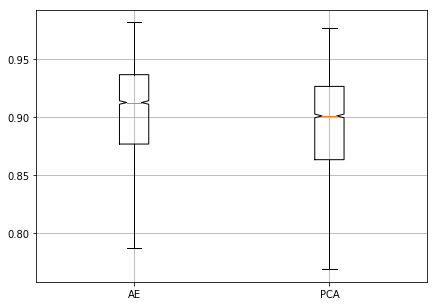

In [161]:
_, out = get_network_output(ae_1, 2)
out_pca = comp_pca(2)
d = {'AE':out, 'PCA': out_pca}
find_correlation_coeff(d)

PCA 0.18901852389560414
AE 0.17569962369646144
Baseline 0.23705086657878702


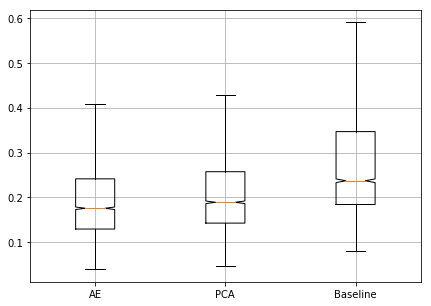

In [162]:
pca_mse = find_scaled_mse(electrode_data_test, out_pca, 'PCA')
ae_mse = find_scaled_mse(electrode_data_test, out, 'AE')
out_base = np.zeros((3869, 255))
for i in range(255):
    out_base[:, i] = np.mean(electrode_data_test[:, i])
baseline = find_scaled_mse(electrode_data_test, out_base, 'Baseline')
gen_boxplots({'AE': ae_mse, 'PCA': pca_mse, 'Baseline': baseline})

In [166]:
ae_improv = (np.median(baseline) - np.median(ae_mse))/np.median(baseline)
ae_improv *= 100

pca_improv = (np.median(baseline) - np.median(pca_mse))/np.median(baseline)
pca_improv *= 100

print('AE: ', ae_improv)
print('PCA: ', pca_improv)

AE:  25.88104560332188
PCA:  20.262462388939923


In [168]:
print(np.median(baseline))

0.23705086657878702


In [186]:
np.median(ae_mse)

0.17569962369646144